# Tren de pulsos cuadrados

[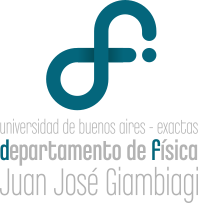](https://www.df.uba.ar/)

[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  

---

## Enunciado

### a) Linealidad de la transformada
Muestre que $\mathcal{F}$ es lineal, por tanto
$
\mathcal{F} \left( a f(x) + b g(x) \right) = a \mathcal{F} f(x) + b \mathcal{F} g(x),
$
donde $a$, $b$ son constantes.

### b) Aplicando la linealidad a la transformada de un tren de pulsos 
\\(\phi(t)\\) es una serie de pulsos cuadrados de duración \\(\Delta t\\) que se presentan $N$ veces con un período $\tau$ (\\(\Delta t < \tau\\)).
Si \\(f(n,t)\\) describe la función en cualquiera de los intervalos \\( [n \tau, (n+1) \tau] \\) que contiene estos pulsos de amplitud no nula $\phi_0$ en $[n\tau, n \tau + \Delta t]$ de forma que \\(\phi(t)= \sum_{n=0}^{N-1} f(n,t)\\), compruebe que 
$$
\mathcal{F} \phi(t) = \mathcal{F} \left[ \sum_{n=0}^{N-1} f(n,t) \right] = \sum_{n=0}^{N-1} \operatorname{e}^{ - i n \omega \tau} \mathcal{F} f(0,t).
$$
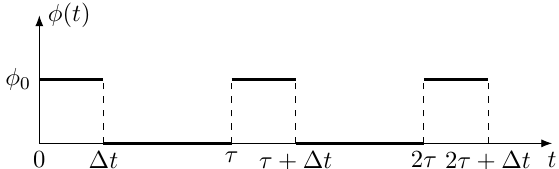

### c) Transformada del período del primer pulso
Resuelva \\(\mathcal{F} f(0,t)\\) para obtener la expresión completa de $\hat{\phi }(\nu) = \mathcal{F} \phi(t)$.

In [1]:
import sympy as sym
from sympy.physics import mechanics as mech
# mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

In [2]:
t= sym.symbols('t', real= True)
delta_t = sym.Symbol('\Delta t', positive=True)
tau, omega, phi_0 = sym.symbols('tau, omega, phi_0', real=True)
n, N = sym.symbols('n, N', integer=True)
f_t = sym.Function('f')(n, t)
f_t_n = sym.Eq(f_t, sym.Piecewise( (0, t < tau* n),
                              (0, t > tau *n + delta_t),
                              (phi_0, True) 
                             ) 
            )
f_t_0 = f_t_n.subs(n,0)
f_t_0

Eq(f(0, t), Piecewise((0, (\Delta t < t) | (t < 0)), (phi_0, True)))

$$
\int_{-\infty}^{\infty} f(t) \mathrm{e}^{- i 2 \pi \nu t}d t
= \int_{0}^{\Delta t} \phi_0 \mathrm{e}^{- i 2 \pi \nu t}d t
$$

In [3]:
nu = sym.symbols('nu', real= True)
f_nu_0_versiónA = sym.Eq(sym.Mul(sym.Symbol('\mathcal{F}'), f_t_0.lhs) , sym.fourier_transform(f_t_0.rhs, t, nu) )
f_nu_0_versiónA

Eq(\mathcal{F}*f(0, t), Piecewise((-I*phi_0/(2*pi*nu) + I*phi_0*exp(-2*I*pi*\Delta t*nu)/(2*pi*nu), Ne(nu, 0)), (\Delta t*phi_0, True)))

De estas soluciones nos quedamos con la no trivial ($\nu \neq 0$) y sacamos un cómodo factor común que nos permite encontrar escondida una función trigonométrica.

In [4]:
factorComún = (phi_0/ (2* sym.pi* nu) )* sym.exp(-sym.I* sym.pi* delta_t* nu)
f_nu_0_versiónB = sym.Eq(f_nu_0_versiónA.lhs,
                         factorComún* (f_nu_0_versiónA.rhs.args[0][0]/ factorComún).expand()
                        )
f_nu_0_versiónB

Eq(\mathcal{F}*f(0, t), phi_0*(-I*exp(I*pi*\Delta t*nu) + I*exp(-I*pi*\Delta t*nu))*exp(-I*pi*\Delta t*nu)/(2*pi*nu))

In [5]:
f_nu_0_versiónC = f_nu_0_versiónB.subs(f_nu_0_versiónB.rhs.args[4],
                                       f_nu_0_versiónB.rhs.args[4].rewrite(sym.sin).simplify()
                                      )
f_nu_0_versiónC

Eq(\mathcal{F}*f(0, t), phi_0*exp(-I*pi*\Delta t*nu)*sin(pi*\Delta t*nu)/(pi*nu))

A nadie se le escapa que esto puede escribirse como un seno cardinal.

In [6]:
f_nu_0_versiónD = f_nu_0_versiónC.subs(f_nu_0_versiónC.rhs.args[4]/ (sym.pi* nu), delta_t* sym.sinc(sym.pi* delta_t* nu) )
f_nu_0_versiónD

Eq(\mathcal{F}*f(0, t), \Delta t*phi_0*exp(-I*pi*\Delta t*nu)*sinc(pi*\Delta t*nu))

Hora de escibir $\hat{\phi }(\nu)$ aprovechando lo probado (¡ejem!) en los puntos anteriores.

In [7]:
phi_nu = sym.Function('phi')(nu)
phi_nu_N = sym.Eq(phi_nu,
                  sym.Sum(sym.exp(-sym.I *n * 2* sym.pi* nu* tau )* f_nu_0_versiónD.rhs , (n, 0, N-1) )
                 )
phi_nu_N

Eq(phi(nu), Sum(\Delta t*phi_0*exp(-I*pi*\Delta t*nu)*exp(-2*I*pi*n*nu*tau)*sinc(pi*\Delta t*nu), (n, 0, N - 1)))

Como cuento incluyendo el $n=0$ el número de períodos $\tau$ es $N-1$.

In [8]:
phi_nu_N_simp = phi_nu_N.simplify()
phi_nu_N_simp

Eq(phi(nu), \Delta t*phi_0*exp(-I*pi*\Delta t*nu)*sinc(pi*\Delta t*nu)*Sum(exp(-2*I*pi*n*nu*tau), (n, 0, N - 1)))

### d) Efecto del período del tren $\tau$
El rasgo más prominente de \\(\hat{\phi }(\nu)\\) son picos en \\(\nu_p = p \nu_1 \; (p \in \mathbb{N})\\) donde \\(\nu_1 = \frac{1}{\tau}\\), es decir, una serie de armónicos de \\(\nu_1\\).
Encuentre en la expresión de \\(\hat{\phi }(\nu)\\) el término que depende de \\(\tau\\) responsable de este comportamiento y verifique \\(\nu_p\\). 

El término en cuestión es

In [9]:
phi_nu_N_simp.rhs.args[2]

Sum(exp(-2*I*pi*n*nu*tau), (n, 0, N - 1))

E.g. en un tren de $10$ pulsos

In [10]:
suma_picos_10 = phi_nu_N_simp.rhs.args[2].subs(N,10)
suma_picos_10

Sum(exp(-2*I*pi*n*nu*tau), (n, 0, 9))

La parte real de cada término de esta sumatoria es
$$
\cos(-2\pi n \nu \tau) = \cos(2\pi n \nu \tau).
$$

In [11]:
suma_picos_10_real = sym.Abs(suma_picos_10).doit().expand().simplify()
suma_picos_10_real

sqrt(18*cos(2*pi*nu*tau) + 16*cos(4*pi*nu*tau) + 14*cos(6*pi*nu*tau) + 12*cos(8*pi*nu*tau) + 10*cos(10*pi*nu*tau) + 8*cos(12*pi*nu*tau) + 6*cos(14*pi*nu*tau) + 4*cos(16*pi*nu*tau) + 2*cos(18*pi*nu*tau) + 10)

Los máximos, los picos, se presentan cada vez que el argumento de estos cosenos se iguala a $2 \pi$.
Puede verse en la serie que esto pasa cada vez que $\nu$ se incrementa en $\frac{1}{\tau}$.

Para visualizar esto grafico $|\hat{\phi}(t)|$ con unos $\Delta t$ y $\tau$ arbitarios.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.style import use as meGusta
meGusta('fivethirtyeight') # estilo de gráficos con grilla y letras grandes

In [13]:
magnitudes = {
    phi_0 : 1, # [arb]
    delta_t : 1E-3, # [s]
    tau : 1E-2, # [s]
}

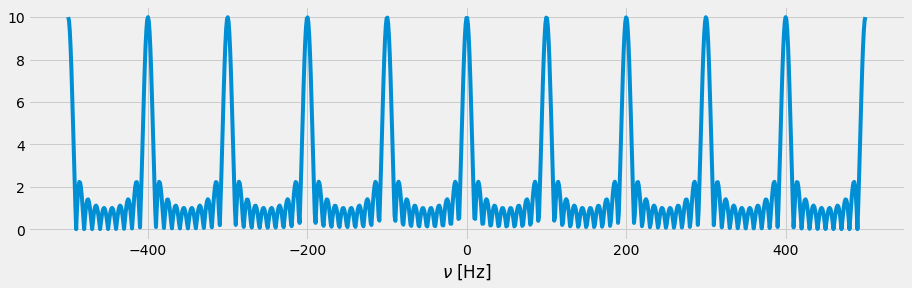

In [14]:
suma_picos_nu_módulo = sym.Abs(suma_picos_10).doit()
suma_picos_nu_módulo_magnitudes = suma_picos_nu_módulo.subs(magnitudes)
suma_picos_nu_módulo_lambdify = sym.lambdify(nu, suma_picos_nu_módulo_magnitudes)
nus = np.linspace(-5E2,5E2,num=int(1E3))
fig, ax = plt.subplots(figsize=(14,4) )
ax.set_xlabel(r'$\nu$ [Hz]')
ax.plot(nus, suma_picos_nu_módulo_lambdify(nus))

Donde se ven que los picos están equiespaciados cada $\frac{1}{\tau} = \frac{1}{1\,10^{-2}\,\mathrm{s}} = 100\,\mathrm{Hz}$.

Veamos para la expresión completa

In [15]:
phi_nu_10 = phi_nu_N.rhs.subs(N,10)
phi_nu_10

Sum(\Delta t*phi_0*exp(-I*pi*\Delta t*nu)*exp(-2*I*pi*n*nu*tau)*sinc(pi*\Delta t*nu), (n, 0, 9))

como se ve $|\hat{\phi}(\nu)|^2$

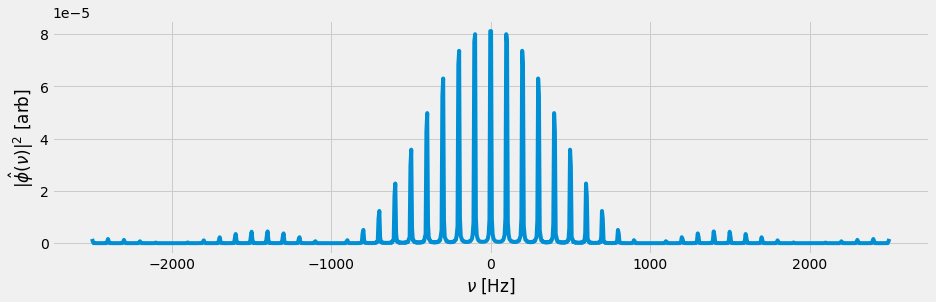

In [19]:
suma_picos_nu_10 = phi_nu_10.doit()
suma_picos_nu_10*= suma_picos_nu_10.conjugate()
# suma_picos_nu_10 = (sym.Abs(phi_nu_10).doit() )**2
suma_picos_nu_10_magnitudes = suma_picos_nu_10.subs(magnitudes)
suma_picos_nu_10_lambdify = sym.lambdify(nu, suma_picos_nu_10_magnitudes)
nus = np.linspace(-2.5E3, 2.5E3, num= int(1E3) )
fig, ax = plt.subplots(figsize=(14,4) )
ax.set_xlabel(r'$\nu$ [Hz]')
ax.set_ylabel(r'$|\hat{\phi}(\nu)|^2$ [arb]')
ax.plot(nus, suma_picos_nu_10_lambdify(nus))

Aquí se hace evidente el efecto del seno cardinal modulando la amplitud de los picos espectrales.

### e) Efecto del tiempo activo del pulso $\Delta t$ en el período del tren (duty cycle)
De similar análisis identifique qué término con dependencia en \\(\Delta t\\) hace que los armónicos más importantes se detecten en \\(0 < \nu < \frac{1}{\Delta t}\\).

Aquí el termino relevante es

In [ ]:
phi_nu_N.rhs.args[0].args[4]

En el último gráfico se aprecia que entre los primeros ceros del seno cardinal, en $\nu = \pm \frac{1}{\Delta t}$ están los picos más prominentes.
Recordemos que
$$
\operatorname{senc}(\pi \Delta t \nu) = \frac{\sin(\pi \Delta t \nu)}{\pi \Delta t \nu}
$$
que tendrá sus ceros en los $\nu$ que anulen el seno en el numerador
$$
\begin{aligned}
\sin(\pi \Delta t \nu_\mathrm{ceros}) &= 0\\
\pi \Delta t \nu_\mathrm{ceros} &= m \pi \,(m \in \mathbb{Z})\\
\nu_\mathrm{ceros} &= m \frac{1}{\Delta t }\\
\end{aligned}
$$
esto es válido en particular para los primeros ceros que engloban el lóbulo principal, $m = \pm 1$.

### f) Ancho de picos
Compruebe también que el ancho de banda de los armónicos es \\(\delta \nu = \frac{2}{N \tau}\\), y calcule cuánto más pequeño es que el $\Delta \nu$ entre sucesivos $\nu_p$.

> Referencia  
> Sección 4.3.3 "Síntesis de señales"  
> Ondas  
> R. Depine  
> 2020, Buenos Aires  
> http://bit.ly/F2Depinev02

Por ancho de banda de cada armónico se entiende el rango de $\nu$ que ocupa cada uno de los picos.
Una forma de delimitarles es determinar los ceros a cada lado de estos.
Para esto es conveniente re-escribir la expresión del espectro

In [ ]:
phi_nu_N_simp = phi_nu_N.simplify()
phi_nu_N_simp

Como $N$ es finito hay una formulación cerrada para la sumatoria de esta serie geométrica
$$
\sum_{n=0}^{N-1} \mathrm{e}^{-2 i \pi n \nu \tau} 
= \sum_{n=0}^{N-1} \left(\mathrm{e}^{-2 i \pi \nu \tau} \right)^n
= \frac{\left(\mathrm{e}^{-2 i \pi \nu \tau} \right)^N - 1}{\left(\mathrm{e}^{-2 i \pi \nu \tau} \right) - 1}
= \frac{\mathrm{e}^{-2 i \pi \nu \tau N}  - 1}{\mathrm{e}^{-2 i \pi \nu \tau} - 1}
$$
Esta última forma puede escribirse en función de funciones trigonométricas
$$
\frac{\mathrm{e}^{-2 i \pi \nu \tau N}  - 1}{\mathrm{e}^{-2 i \pi \nu \tau} - 1}
=  \left(\frac{\mathrm{e}^{-i \pi \nu \tau N}}{\mathrm{e}^{-i \pi \nu \tau}} \right) \frac{\mathrm{e}^{-i \pi \nu \tau N} - \mathrm{e}^{i \pi \nu \tau N}}{\mathrm{e}^{-i \pi \nu \tau} - \mathrm{e}^{i \pi \nu \tau N}}
=  \left(\mathrm{e}^{-i \pi \nu \tau (N-1)} \right) \frac{-2 i \sin(\pi \nu \tau N)}{-2 i \sin(\pi \nu \tau)}
=  \mathrm{e}^{-i \pi \nu \tau (N-1)}\frac{\sin(\pi \nu \tau N)}{\sin(\pi \nu \tau)}
$$


Toda vez que $\nu = p \frac{1}{\tau}$ estos senos resultan en una indeterminación del tipo "cero sobre cero" que al resolver el límite por L'Hôpital dan como resultado $1$, y para esas $\nu$ se produce un pico.

Pero el numerador presenta más ceros que el numerador por su $N$ extra.
$$
\sin(\pi \nu_\mathrm{cero} \tau N) = 0\\
\pi \nu_\mathrm{cero} \tau N = m \pi\,(m \in \mathbb{Z})\\
\nu_\mathrm{cero} = m \frac{1}{N \tau}\\
$$
Tomemos $m = \pm 1$ para los ceros contiguos a un pico y tenemos que el ancho de banda así descripto es
$$
\delta \nu = \frac{1}{N \tau} - \frac{-1}{N \tau} = \frac{2}{N \tau}
$$

Este ancho es más pequeño que el $\Delta \nu$ entre picos si
$$
\delta \nu < \Delta \nu\\
\frac{2}{N \tau} < \frac{1}{\tau}\\ 
\frac{2}{N} < 1\\ 
$$
es decir para cualquier $N>2$.

Debajo escribimos la expresión más compacta para el espectro $\hat{\phi})(\nu)$

In [ ]:
phi_nu_N_trig = phi_nu_N_simp.subs(phi_nu_N_simp.rhs.args[2],
                                   sym.exp(-sym.I* sym.pi* nu* tau* (N - 1))* (sym.sin(sym.pi* nu* tau* N)/ sym.sin(sym.pi* nu* tau))
                                  )
phi_nu_N_trig